In [1]:
import numpy as np
from StackGP import *
import pandas as pd

In [2]:
data=pd.read_csv("/Users/nathanhaut/Downloads/pmlb/datasets/195_auto_price/195_auto_price.csv")
vars=data.columns
inputData=np.array(data.T)[:-1]
response=np.array(data.T)[-1]

In [3]:
func=basisFunctionComplexityDiff(2,5)

In [4]:
models=evolve(inputData,response,modelEvaluationMetrics=[fitness,func],tourneySize=20,generations=10,align=False)

In [5]:
len(inputData)

15

In [110]:
models=initializeGPModels(15,maxLength=100)
[setModelQuality(mod,inputData,response,modelEvaluationMetrics=[fitness,func]) for mod in models];

In [123]:
i+=1
func(models[i])

5

In [127]:
sym.expand(printGPModel(models[i]))

x4**2/sqrt(1/(1.43685313379129e-26*x11**8*exp(-4*x2)*exp(-4*x6**2)*exp(0.0410639290187373*x10/(0.0102659822546843*x1**2*x10**2 + 0.0410639290187373*x1**2*x10*x14 - 0.0205319645093687*x1**2*x10*x4 - 0.0205319645093687*x1**2*x10*x6 + 0.0205319645093687*x1**2*x10*x8 - 0.0205319645093687*x1**2*x10*x9/x11**2 + 0.0205319645093687*x1**2*x10/(x11**2*exp(x12)**(1/8)) + 0.0410639290187373*x1**2*x14**2 - 0.0410639290187373*x1**2*x14*x4 - 0.0410639290187373*x1**2*x14*x6 + 0.0410639290187373*x1**2*x14*x8 + 0.0102659822546843*x1**2*x4**2 + 0.0205319645093687*x1**2*x4*x6 - 0.0205319645093687*x1**2*x4*x8 + 0.0102659822546843*x1**2*x6**2 - 0.0205319645093687*x1**2*x6*x8 + 0.0102659822546843*x1**2*x8**2 - 0.0410639290187373*x1**2*x14*x9/x11**2 + 0.0410639290187373*x1**2*x14/(x11**2*exp(x12)**(1/8)) + 0.0205319645093687*x1**2*x4*x9/x11**2 - 0.0205319645093687*x1**2*x4/(x11**2*exp(x12)**(1/8)) + 0.0205319645093687*x1**2*x6*x9/x11**2 - 0.0205319645093687*x1**2*x6/(x11**2*exp(x12)**(1/8)) - 0.02053196450936

In [1]:
models

NameError: name 'models' is not defined

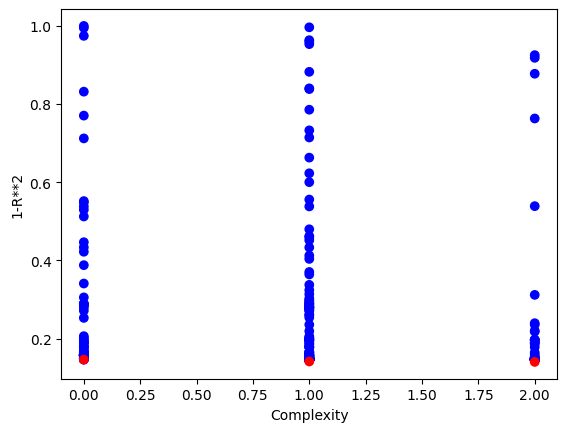

In [ ]:
plotModels(models)

In [ ]:
printGPModel(models[0])

x4**6*(x11 + x6 - 1)**2

In [ ]:
basisFunctionComplexity(models[0])

6

In [130]:
eq1=printGPModel(models[1])

In [135]:
import re
from sympy import simplify

def count_basis_terms(equation):
    # Step 1: Simplify the equation to get rid of trivial operations
    simplified_eq = simplify(equation)
    
    # Step 2: Split the equation into terms by identifying '+' or '-' not within parentheses
    terms = re.split(r'(?<![\(\^])[\+\-]', str(simplified_eq))
    
    # Step 3: Filter out empty strings and whitespace
    terms = [term.strip() for term in terms if term.strip()]
    print("terms: ",terms)
    # Return the count of basis terms
    return len(terms)

# Examples
#eq1 = "(x^2 + y)*(z+b)"
#eq2 = "x^(a+2x) + y^(x-z)"

count1 = count_basis_terms(eq1)
#count2 = count_basis_terms(eq2)

print(f"Number of basis terms in eq1: {count1}")
#print(f"Number of basis terms in eq2: {count2}")


terms:  ['(x2', 'x8)*exp((-x13*x2', '1)/x2)']
Number of basis terms in eq1: 3


In [158]:
o+=1
eq=printGPModel(models[o])
eq

exp(exp(x1 + x2) - 1/(x4 - exp(x5*(x4 - x8)*exp(-x12*(x7 + (x4/(x11*x3) - 0.101321183642338*x14**4/(x11**4*exp(exp(x3**(1/4)))**(1/4)))**2))))**2)

In [163]:
count_basis_terms(eq)

1000

In [ ]:
import signal
from contextlib import contextmanager

class TimeoutException(Exception): pass

@contextmanager
def time_limit(seconds):
    def signal_handler(signum, frame):
        raise TimeoutException("Timed out!")
    signal.signal(signal.SIGALRM, signal_handler)
    signal.alarm(seconds)
    try:
        yield
    finally:
        signal.alarm(0)

In [161]:
from sympy import symbols, simplify, expand

def count_basis_terms(equation):
    try:
        with time_limit(2):
            # Step 1: Simplify the equation to standardize the expression
            simplified_eq = simplify(equation)
        
            # Step 2: Expand the expression to identify additive terms clearly
            expanded_eq = expand(simplified_eq)
            
            # Step 3: Separate the terms of the expression
            terms = expanded_eq.as_ordered_terms()
            print(terms)
            # Return the count of basis terms
    except TimeoutException as e:
        return 1000
    return len(terms)


In [160]:



try:
    with time_limit(10):
        print(count_basis_terms(eq))
except TimeoutException as e:
    print("Timed out!")

Timed out!


In [162]:
count_basis_terms(eq)

1000